## SRFP AQI data analysis and visualization for Kolkata

In [1]:
import sys
sys.path.append('..')
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import datetime

from functions import dplot, stat_calc, aqi_calc, score_calc

# Use seaborn style defaults and set default figure size
sns.set_style("whitegrid")

In [2]:
dfmod = pd.read_csv('./data/kolkata_mod.csv')
dfobs = pd.read_csv('./data/kolkata_obs.csv')

In [3]:
dfmod.head()

,date,hour,mod_PM2.5,mod_PM2.5_stdev,mod_PM10,mod_PM10_stdev
0,2020-10-31,1:00:00,46.36,2.57,54.75,3.65
1,2020-10-31,2:00:00,40.57,2.65,46.79,3.57
2,2020-10-31,3:00:00,34.49,2.16,39.36,2.67
3,2020-10-31,4:00:00,30.73,0.85,35.28,0.98
4,2020-10-31,5:00:00,24.28,1.47,28.38,1.61


In [4]:
dfobs.head()

,date,hour,obs_PM2.5,obs_PM2.5_stdev,obs_PM10,obs_PM10_stdev
0,2020-10-31,1:00:00,59.00,12.55,122.76,17.01
1,2020-10-31,2:00:00,58.52,14.22,125.64,24.18
2,2020-10-31,3:00:00,56.88,13.94,121.51,17.67
3,2020-10-31,4:00:00,55.03,10.92,119.27,15.41
4,2020-10-31,5:00:00,56.63,11.39,114.12,15.08


In [5]:
dfmod.isna().sum()

date               0
hour               0
mod_PM2.5          0
mod_PM2.5_stdev    0
mod_PM10           0
mod_PM10_stdev     0
dtype: int64

In [6]:
dfobs.isna().sum()

date                 0
hour                 0
obs_PM2.5          357
obs_PM2.5_stdev    379
obs_PM10           357
obs_PM10_stdev     378
dtype: int64

In [7]:
dfmod['datetime'] = pd.to_datetime(dfmod.date) + pd.to_timedelta(dfmod.hour)
dfobs['datetime'] = pd.to_datetime(dfobs.date) + pd.to_timedelta(dfobs.hour)

dfmod = dfmod.set_index(dfmod.datetime)
dfobs = dfobs.set_index(dfobs.datetime)

dfmod = dfmod.drop(['date', 'hour'], axis=1)
dfobs = dfobs.drop(['date', 'hour'], axis=1)

In [8]:
dfmod.head()

,mod_PM2.5,mod_PM2.5_stdev,mod_PM10,mod_PM10_stdev,datetime
datetime,,,,,
2020-10-31 01:00:00,46.36,2.57,54.75,3.65,2020-10-31 01:00:00
2020-10-31 02:00:00,40.57,2.65,46.79,3.57,2020-10-31 02:00:00
2020-10-31 03:00:00,34.49,2.16,39.36,2.67,2020-10-31 03:00:00
2020-10-31 04:00:00,30.73,0.85,35.28,0.98,2020-10-31 04:00:00
2020-10-31 05:00:00,24.28,1.47,28.38,1.61,2020-10-31 05:00:00


In [9]:
dfobs = dfobs.interpolate(method='time')

In [10]:
dfobs.isna().sum()

obs_PM2.5          0
obs_PM2.5_stdev    0
obs_PM10           0
obs_PM10_stdev     0
datetime           0
dtype: int64

### Plot of time series with error bars

In [11]:
# Removing the october readings temporarily

dfmod = dfmod.iloc[23:, :]
dfobs = dfobs.iloc[23:, :]

In [12]:
dfmod.head()

,mod_PM2.5,mod_PM2.5_stdev,mod_PM10,mod_PM10_stdev,datetime
datetime,,,,,
2020-11-01 00:00:00,13.85,0.94,17.04,1.28,2020-11-01 00:00:00
2020-11-01 01:00:00,13.25,1.48,16.33,1.85,2020-11-01 01:00:00
2020-11-01 02:00:00,12.38,1.07,15.18,1.50,2020-11-01 02:00:00
2020-11-01 03:00:00,10.39,1.09,12.62,1.39,2020-11-01 03:00:00
2020-11-01 04:00:00,11.14,0.74,13.39,0.87,2020-11-01 04:00:00


In [13]:
# Extracting the different values for the months

dfmod['month'] = dfmod.index.month
dfobs['month'] = dfobs.index.month

splits1 = dfmod.groupby('month')
splits2 = dfobs.groupby('month')

dfmod_jan = list(splits1)[0][1]
dfmod_nov = list(splits1)[1][1]
dfmod_dec = list(splits1)[2][1]

dfobs_jan = list(splits2)[0][1]
dfobs_nov = list(splits2)[1][1]
dfobs_dec = list(splits2)[2][1]

dfmod_jan

,mod_PM2.5,mod_PM2.5_stdev,mod_PM10,mod_PM10_stdev,datetime,month
datetime,,,,,,
2021-01-01 00:00:00,138.67,3.54,208.74,5.50,2021-01-01 00:00:00,1
2021-01-01 01:00:00,126.54,3.32,186.26,5.27,2021-01-01 01:00:00,1
2021-01-01 02:00:00,113.26,2.81,163.72,4.07,2021-01-01 02:00:00,1
2021-01-01 03:00:00,103.00,2.05,147.42,2.80,2021-01-01 03:00:00,1
2021-01-01 04:00:00,95.78,1.91,136.40,2.65,2021-01-01 04:00:00,1
...,...,...,...,...,...,...
2021-01-31 19:00:00,187.50,2.69,227.73,2.47,2021-01-31 19:00:00,1
2021-01-31 20:00:00,188.38,5.72,229.34,7.80,2021-01-31 20:00:00,1
2021-01-31 21:00:00,184.45,6.38,224.30,9.29,2021-01-31 21:00:00,1


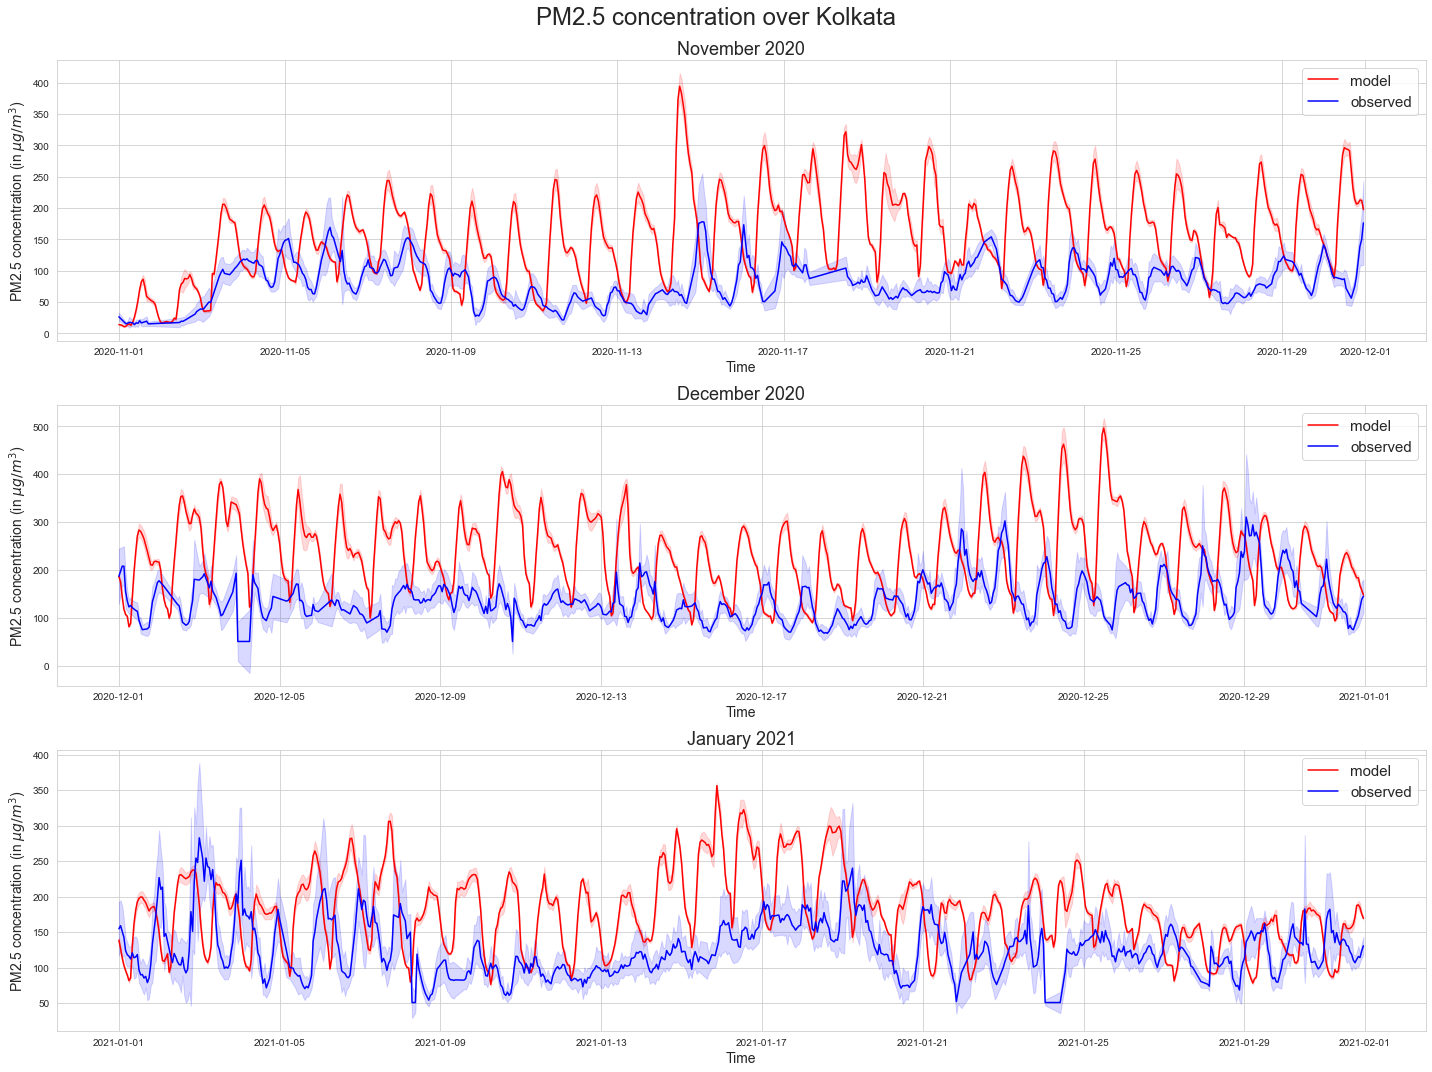

In [14]:
# Plot of PM2.5 model and data for Nov, Dec and Jan with errorbars

fig = plt.figure(figsize=(20,15))
plt.subplot(311)
sns.lineplot(data = dfmod_nov, x='datetime', y='mod_PM2.5', err_style='band', label='model', color='red')
# plt.errorbar(dfmod_nov.index, dfmod_nov['mod_PM2.5'], yerr=dfmod_nov['mod_PM2.5_stdev'], alpha=0.15, ecolor='blue', fmt='o', mfc='blue', markersize=8, capsize=10)
plt.fill_between(dfmod_nov.index, dfmod_nov['mod_PM2.5'] + dfmod_nov['mod_PM2.5_stdev'], dfmod_nov['mod_PM2.5'] - dfmod_nov['mod_PM2.5_stdev'], alpha=0.15, color='red')
sns.lineplot(data = dfobs_nov, x='datetime', y='obs_PM2.5', err_style='band', label='observed', color='blue')
# plt.errorbar(dfobs_nov.index, dfobs_nov['obs_PM2.5'], yerr=dfobs_nov['obs_PM2.5_stdev'], alpha=0.15, ecolor='green', fmt='o', mfc='green', markersize=8, capsize=10)
plt.fill_between(dfobs_nov.index, dfobs_nov['obs_PM2.5'] + dfobs_nov['obs_PM2.5_stdev'], dfobs_nov['obs_PM2.5'] - dfobs_nov['obs_PM2.5_stdev'], alpha=0.15, color='blue')
plt.ylabel('PM2.5 concentration (in $\mu g/m^3$)', fontsize=14)
plt.xlabel('Time', fontsize=14)
plt.legend(loc=1, prop={'size': 15})
plt.title('November 2020', fontsize=18)

plt.subplot(312)
sns.lineplot(data = dfmod_dec, x='datetime', y='mod_PM2.5', err_style='band', label='model', color='red')
# plt.errorbar(dfmod_dec.index, dfmod_dec['mod_PM2.5'], yerr=dfmod_dec['mod_PM2.5_stdev'], alpha=0.15, ecolor='blue', fmt='o', mfc='blue', markersize=8, capsize=10)
plt.fill_between(dfmod_dec.index, dfmod_dec['mod_PM2.5'] + dfmod_dec['mod_PM2.5_stdev'], dfmod_dec['mod_PM2.5'] - dfmod_dec['mod_PM2.5_stdev'], alpha=0.15, color='red')
sns.lineplot(data = dfobs_dec, x='datetime', y='obs_PM2.5', err_style='band', label='observed', color='blue')
# plt.errorbar(dfobs_dec.index, dfobs_dec['obs_PM2.5'], yerr=dfobs_dec['obs_PM2.5_stdev'], alpha=0.15, ecolor='green', fmt='o', mfc='green', markersize=8, capsize=10)
plt.fill_between(dfobs_dec.index, dfobs_dec['obs_PM2.5'] + dfobs_dec['obs_PM2.5_stdev'], dfobs_dec['obs_PM2.5'] - dfobs_dec['obs_PM2.5_stdev'], alpha=0.15, color='blue')
plt.ylabel('PM2.5 concentration (in $\mu g/m^3$)', fontsize=14)
plt.xlabel('Time', fontsize=14)
plt.legend(loc=1, prop={'size': 15})
plt.title('December 2020', fontsize=18)

plt.subplot(313)
sns.lineplot(data = dfmod_jan, x='datetime', y='mod_PM2.5', err_style='band', label='model', color='red')
# plt.errorbar(dfmod_jan.index, dfmod_jan['mod_PM2.5'], yerr=dfmod_jan['mod_PM2.5_stdev'], alpha=0.15, ecolor='blue', fmt='o', mfc='blue', markersize=8, capsize=10)
plt.fill_between(dfmod_jan.index, dfmod_jan['mod_PM2.5'] + dfmod_jan['mod_PM2.5_stdev'], dfmod_jan['mod_PM2.5'] - dfmod_jan['mod_PM2.5_stdev'], alpha=0.15, color='red')
sns.lineplot(data = dfobs_jan, x='datetime', y='obs_PM2.5', err_style='band', label='observed', color='blue')
# plt.errorbar(dfobs_jan.index, dfobs_jan['obs_PM2.5'], yerr=dfobs_jan['obs_PM2.5_stdev'], alpha=0.15, ecolor='green', fmt='o', mfc='green', markersize=8, capsize=10)
plt.fill_between(dfobs_jan.index, dfobs_jan['obs_PM2.5'] + dfobs_jan['obs_PM2.5_stdev'], dfobs_jan['obs_PM2.5'] - dfobs_jan['obs_PM2.5_stdev'], alpha=0.15, color='blue')
plt.ylabel('PM2.5 concentration (in $\mu g/m^3$)', fontsize=14)
plt.xlabel('Time', fontsize=14)
plt.legend(loc=1, prop={'size': 15})
plt.title('January 2021', fontsize=18)

fig.suptitle('PM2.5 concentration over Kolkata', fontsize=24, y=0.99)
fig.tight_layout()
plt.savefig('./images/pm25ts_err.png')

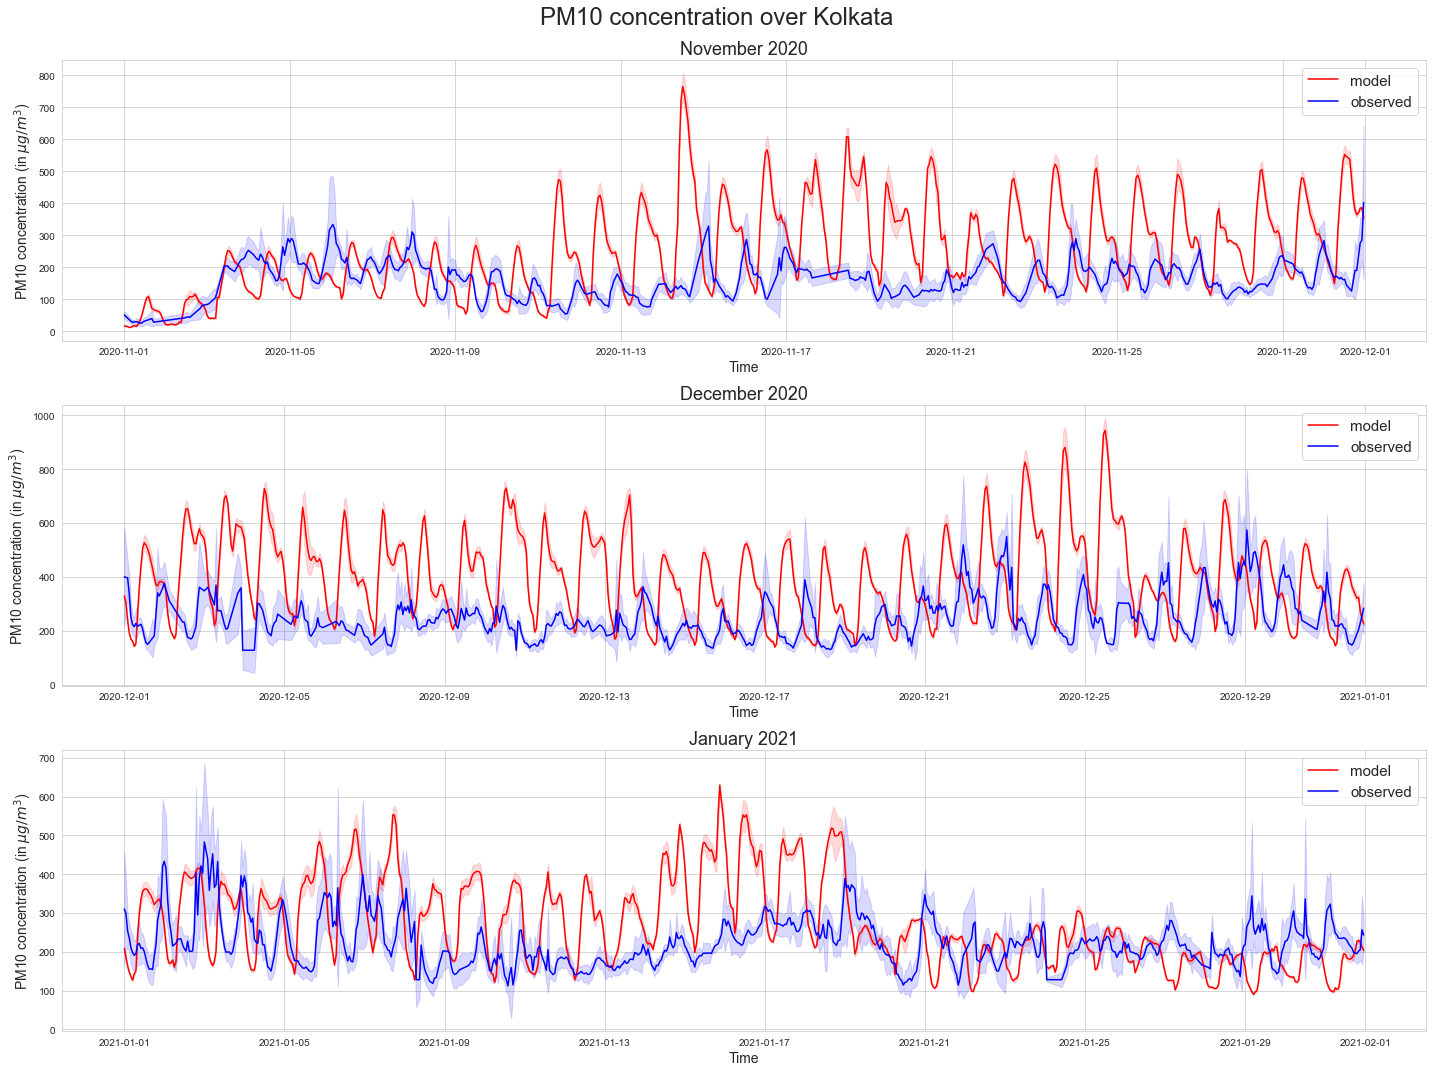

In [15]:
# Plot of PM10 model and data for Nov, Dec and Jan with errorbars

fig = plt.figure(figsize=(20,15))
plt.subplot(311)
sns.lineplot(data = dfmod_nov, x='datetime', y='mod_PM10', err_style='band', label='model', color='red')
# plt.errorbar(dfmod_nov.index, dfmod_nov['mod_PM10'], yerr=dfmod_nov['mod_PM10_stdev '], alpha=0.15, ecolor='blue', fmt='o', mfc='blue', markersize=8, capsize=10)
plt.fill_between(dfmod_nov.index, dfmod_nov['mod_PM10'] + dfmod_nov['mod_PM10_stdev'], dfmod_nov['mod_PM10'] - dfmod_nov['mod_PM10_stdev'], alpha=0.15, color='red')
sns.lineplot(data = dfobs_nov, x='datetime', y='obs_PM10', err_style='band', label='observed', color='blue')
# plt.errorbar(dfobs_nov.index, dfobs_nov['obs_PM10'], yerr=dfobs_nov['obs_PM10_stdev '], alpha=0.15, ecolor='green', fmt='o', mfc='green', markersize=8, capsize=10)
plt.fill_between(dfobs_nov.index, dfobs_nov['obs_PM10'] + dfobs_nov['obs_PM10_stdev'], dfobs_nov['obs_PM10'] - dfobs_nov['obs_PM10_stdev'], alpha=0.15, color='blue')
plt.ylabel('PM10 concentration (in $\mu g/m^3$)', fontsize=14)
plt.xlabel('Time', fontsize=14)
plt.legend(loc=1, prop={'size': 15})
plt.title('November 2020', fontsize=18)

plt.subplot(312)
sns.lineplot(data = dfmod_dec, x='datetime', y='mod_PM10', err_style='band', label='model', color='red')
# plt.errorbar(dfmod_nov.index, dfmod_nov['mod_PM10'], yerr=dfmod_nov['mod_PM10_stdev '], alpha=0.15, ecolor='blue', fmt='o', mfc='blue', markersize=8, capsize=10)
plt.fill_between(dfmod_dec.index, dfmod_dec['mod_PM10'] + dfmod_dec['mod_PM10_stdev'], dfmod_dec['mod_PM10'] - dfmod_dec['mod_PM10_stdev'], alpha=0.15, color='red')
sns.lineplot(data = dfobs_dec, x='datetime', y='obs_PM10', err_style='band', label='observed', color='blue')
# plt.errorbar(dfobs_nov.index, dfobs_nov['obs_PM10'], yerr=dfobs_nov['obs_PM10_stdev '], alpha=0.15, ecolor='green', fmt='o', mfc='green', markersize=8, capsize=10)
plt.fill_between(dfobs_dec.index, dfobs_dec['obs_PM10'] + dfobs_dec['obs_PM10_stdev'], dfobs_dec['obs_PM10'] - dfobs_dec['obs_PM10_stdev'], alpha=0.15, color='blue')
plt.ylabel('PM10 concentration (in $\mu g/m^3$)', fontsize=14)
plt.xlabel('Time', fontsize=14)
plt.legend(loc=1, prop={'size': 15})
plt.title('December 2020', fontsize=18)

plt.subplot(313)
sns.lineplot(data = dfmod_jan, x='datetime', y='mod_PM10', err_style='band', label='model', color='red')
# plt.errorbar(dfmod_nov.index, dfmod_nov['mod_PM10'], yerr=dfmod_nov['mod_PM10_stdev '], alpha=0.15, ecolor='blue', fmt='o', mfc='blue', markersize=8, capsize=10)
plt.fill_between(dfmod_jan.index, dfmod_jan['mod_PM10'] + dfmod_jan['mod_PM10_stdev'], dfmod_jan['mod_PM10'] - dfmod_jan['mod_PM10_stdev'], alpha=0.15, color='red')
sns.lineplot(data = dfobs_jan, x='datetime', y='obs_PM10', err_style='band', label='observed', color='blue')
# plt.errorbar(dfobs_nov.index, dfobs_nov['obs_PM10'], yerr=dfobs_nov['obs_PM10_stdev '], alpha=0.15, ecolor='green', fmt='o', mfc='green', markersize=8, capsize=10)
plt.fill_between(dfobs_jan.index, dfobs_jan['obs_PM10'] + dfobs_jan['obs_PM10_stdev'], dfobs_jan['obs_PM10'] - dfobs_jan['obs_PM10_stdev'], alpha=0.15, color='blue')
plt.ylabel('PM10 concentration (in $\mu g/m^3$)', fontsize=14)
plt.xlabel('Time', fontsize=14)
plt.legend(loc=1, prop={'size': 15})
plt.title('January 2021', fontsize=18)

fig.suptitle('PM10 concentration over Kolkata', fontsize=24, y=0.99)
fig.tight_layout()
plt.savefig('./images/pm10ts_err.png')

### Plot for diurnal variation

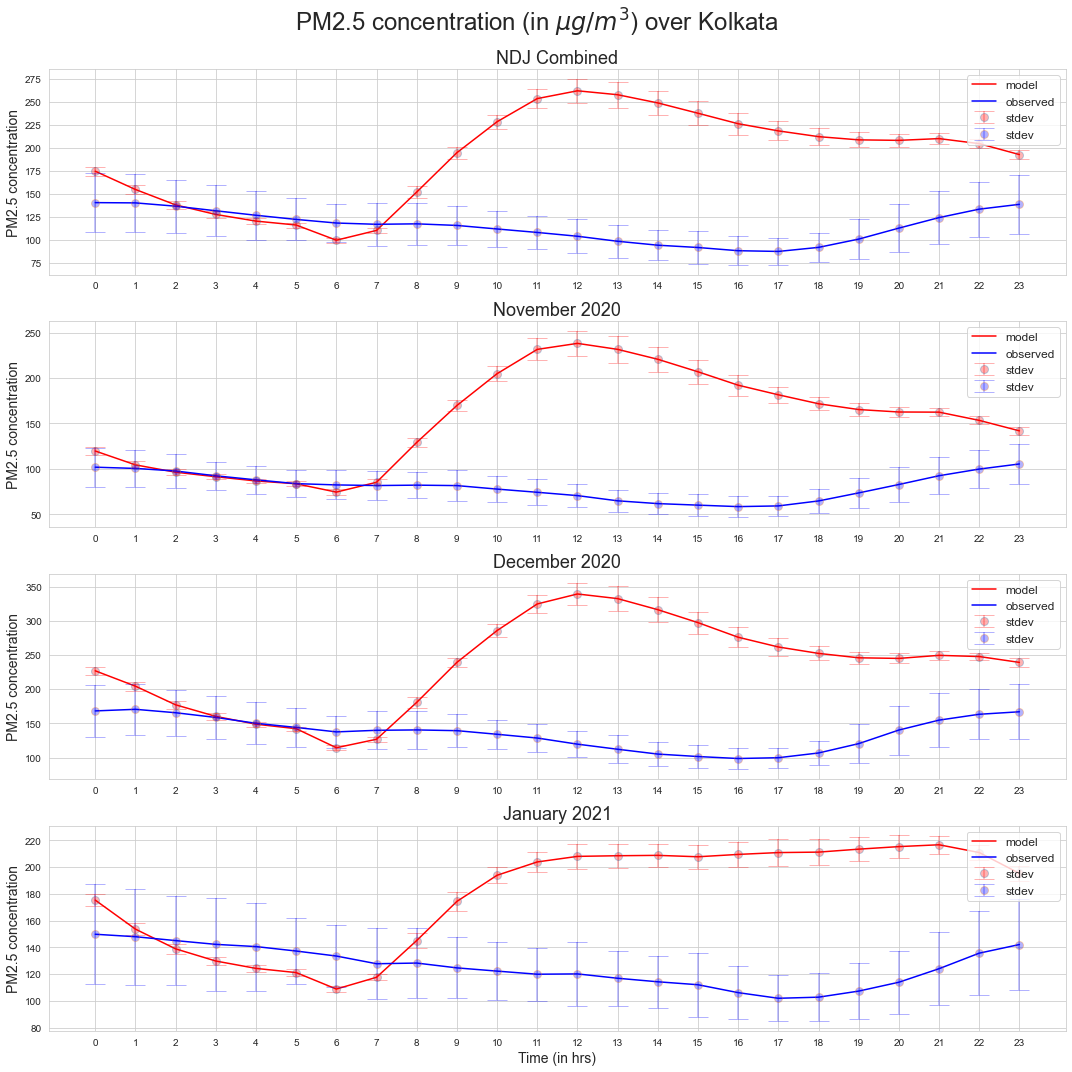

In [16]:
fig = plt.figure(figsize=(15,15))

plt.subplot(411)
dplot.plot(dfmod, dfobs, 'mod_PM2.5', 'obs_PM2.5', mod_stdev='mod_PM2.5_stdev', obs_stdev='obs_PM2.5_stdev')
plt.ylabel('PM2.5 concentration', fontsize=14)
# plt.xlabel('Time (in hrs)', fontsize=14)
plt.title('NDJ Combined', fontsize=18)

plt.subplot(412)
dplot.plot(dfmod_nov, dfobs_nov, 'mod_PM2.5', 'obs_PM2.5', mod_stdev='mod_PM2.5_stdev', obs_stdev='obs_PM2.5_stdev')
plt.ylabel('PM2.5 concentration', fontsize=14)
# plt.xlabel('Time (in hrs)', fontsize=14)
plt.title('November 2020', fontsize=18)

plt.subplot(413)
dplot.plot(dfmod_dec, dfobs_dec, 'mod_PM2.5', 'obs_PM2.5', mod_stdev='mod_PM2.5_stdev', obs_stdev='obs_PM2.5_stdev')
plt.ylabel('PM2.5 concentration', fontsize=14)
# plt.xlabel('Time (in hrs)', fontsize=14)
plt.title('December 2020', fontsize=18)

plt.subplot(414)
dplot.plot(dfmod_jan, dfobs_jan, 'mod_PM2.5', 'obs_PM2.5', mod_stdev='mod_PM2.5_stdev', obs_stdev='obs_PM2.5_stdev')
plt.ylabel('PM2.5 concentration', fontsize=14)
plt.xlabel('Time (in hrs)', fontsize=14)
plt.title('January 2021', fontsize=18)

fig.suptitle('PM2.5 concentration (in $\mu g/m^3$) over Kolkata', fontsize=24, y=0.99)
fig.tight_layout()
plt.savefig('./images/diurnal_pm25.png')

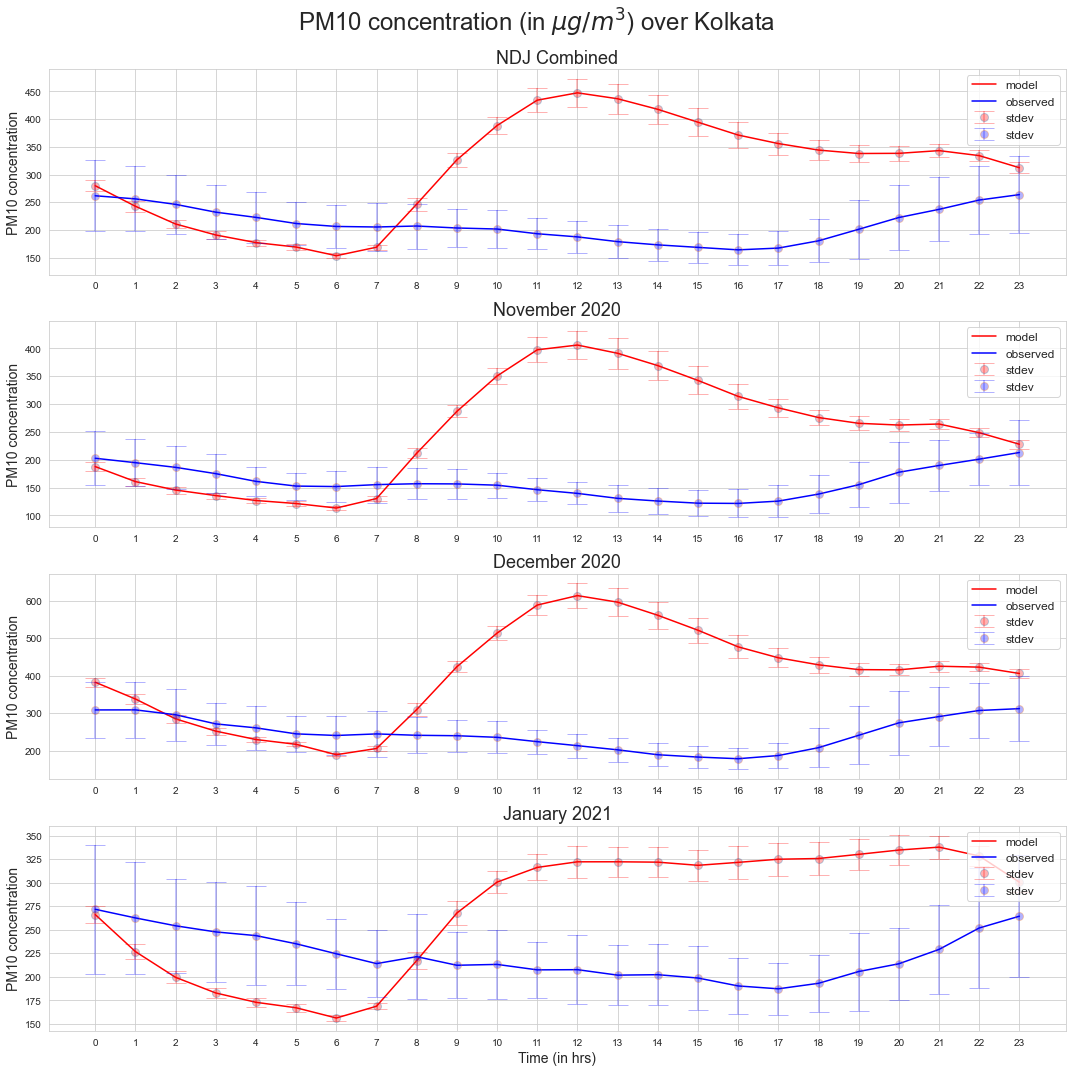

In [17]:
fig = plt.figure(figsize=(15,15))

plt.subplot(411)
dplot.plot(dfmod, dfobs, 'mod_PM10', 'obs_PM10', mod_stdev='mod_PM10_stdev', obs_stdev='obs_PM10_stdev')
plt.ylabel('PM10 concentration', fontsize=14)
# plt.xlabel('Time (in hrs)', fontsize=14)
plt.title('NDJ Combined', fontsize=18)

plt.subplot(412)
dplot.plot(dfmod_nov, dfobs_nov, 'mod_PM10', 'obs_PM10', mod_stdev='mod_PM10_stdev', obs_stdev='obs_PM10_stdev')
plt.ylabel('PM10 concentration', fontsize=14)
# plt.xlabel('Time (in hrs)', fontsize=14)
plt.title('November 2020', fontsize=18)

plt.subplot(413)
dplot.plot(dfmod_dec, dfobs_dec, 'mod_PM10', 'obs_PM10', mod_stdev='mod_PM10_stdev', obs_stdev='obs_PM10_stdev')
plt.ylabel('PM10 concentration', fontsize=14)
# plt.xlabel('Time (in hrs)', fontsize=14)
plt.title('December 2020', fontsize=18)

plt.subplot(414)
dplot.plot(dfmod_jan, dfobs_jan, 'mod_PM10', 'obs_PM10', mod_stdev='mod_PM10_stdev', obs_stdev='obs_PM10_stdev')
plt.ylabel('PM10 concentration', fontsize=14)
plt.xlabel('Time (in hrs)', fontsize=14)
plt.title('January 2021', fontsize=18)

fig.suptitle('PM10 concentration (in $\mu g/m^3$) over Kolkata', fontsize=24, y=0.99)
fig.tight_layout()
plt.savefig('./images/diurnal_pm10.png')

## Take the running average for the data

In [18]:
# redifing the dataframes

dfmod = pd.read_csv('data/kolkata_mod.csv')
dfobs = pd.read_csv('data/kolkata_obs.csv')

In [19]:
dfmod['datetime'] = pd.to_datetime(dfmod.date) + pd.to_timedelta(dfmod.hour)
dfobs['datetime'] = pd.to_datetime(dfobs.date) + pd.to_timedelta(dfobs.hour)

dfmod = dfmod.set_index(dfmod.datetime)
dfobs = dfobs.set_index(dfobs.datetime)

dfmod = dfmod.drop(['date', 'hour'], axis=1)
dfobs = dfobs.drop(['date', 'hour'], axis=1)

In [20]:
dfobs = dfobs.interpolate(method='time')
dfobs.isna().sum()

obs_PM2.5          0
obs_PM2.5_stdev    0
obs_PM10           0
obs_PM10_stdev     0
datetime           0
dtype: int64

In [21]:
dfmod['month'] = dfmod.index.month
dfobs['month'] = dfobs.index.month
dfmod['time'] = dfmod.index.hour
dfobs['time'] = dfobs.index.hour

In [22]:
df = aqi_calc.get_aqi(dfmod, dfobs)

In [23]:
df.head()

,mod_PM2.5,mod_PM10,mod_pm2,mod_pm2_stdev,mod_pm10,mod_pm10_stdev,mod_aqi_pm2,mod_aqi_pm10,quality_mod_pm25,quality_mod_pm10,obs_PM2.5,obs_PM10,obs_pm2,obs_pm2_stdev,obs_pm10,obs_pm10_stdev,obs_aqi_pm2,obs_aqi_pm10,quality_obs_pm25,quality_obs_pm10
datetime,,,,,,,,,,,,,,,,,,,,
2020-11-01 00:00:00,13.85,17.04,38.067500,1.767500,45.908333,2.241250,63.392050,45.908333,1,0,26.266667,51.173333,53.204583,11.118333,110.963958,21.520208,88.519608,107.236212,1,2
2020-11-01 01:00:00,13.25,16.33,36.687917,1.722083,44.307500,2.166250,61.101942,44.307500,1,0,23.500000,46.205000,51.725417,10.823958,107.774167,21.291458,86.064192,105.130950,1,2
2020-11-01 02:00:00,12.38,15.18,35.513333,1.656250,42.990417,2.080000,59.152133,42.990417,1,0,20.733333,41.236667,50.150972,10.416319,104.257361,20.718958,83.450614,102.809858,1,2
2020-11-01 03:00:00,10.39,12.62,34.509167,1.611667,41.876250,2.026667,57.485217,41.876250,1,0,17.966667,36.268333,48.529583,9.976667,100.705625,20.372708,80.759108,100.465712,1,2
2020-11-01 04:00:00,11.14,13.39,33.692917,1.607083,40.964167,2.022083,56.130242,40.964167,1,0,15.200000,31.300000,46.870000,9.619167,97.040208,20.075625,78.004200,97.040208,1,1


In [24]:
df.shape

(2208, 20)

### Critical PM2.5 and PM10 skill scores combine

In [25]:
score_calc.get_critical_score(df)

Key25 is :  ['b', 'd']
The list25 from algorithm is :  dict_keys(['b', 'd', 'a', 'c'])
val25 is :  dict_values([306, 1902, 0, 0])
Key10 is :  ['b', 'd']
The list10 from algorithm is :  dict_keys(['b', 'd', 'a', 'c'])
Val10 is :  dict_values([281, 1927, 0, 0])
ZeroDivisionError
Performance metrics or Skill score for Critical PM2.5 are:

A =  86.1413043478261
FAR =  100.0
CSI =  0.0
FOH =  0.0
PON =  86.1413043478261
POFD =  13.858695652173914
DFR =  0.0
FOCN =  100.0
ZeroDivisionError
Performance metrics or Skill score for Critical PM10 are:

A =  87.27355072463769
FAR =  100.0
CSI =  0.0
FOH =  0.0
PON =  87.27355072463769
POFD =  12.72644927536232
DFR =  0.0
FOCN =  100.0


### Very unhealthy PM2.5 and PM10 skill scores combined

In [26]:
score_calc.get_veryunhealthy_score(df)

Key25 is :  ['a', 'b', 'd']
The list25 from algorithm is :  dict_keys(['a', 'b', 'd', 'c'])
val25 is :  dict_values([954, 1155, 99, 0])
Key10 is :  ['a', 'b', 'd']
The list10 from algorithm is :  dict_keys(['a', 'b', 'd', 'c'])
Val10 is :  dict_values([24, 723, 1461, 0])
Performance metrics or Skill score for Very Unhealthy PM2.5 are:

A =  47.690217391304344
FAR =  54.76529160739687
POD =  100.0
CSI =  45.23470839260313
FOM =  0.0
FOH =  45.23470839260313
PON =  7.894736842105263
POFD =  92.10526315789474
DFR =  0.0
FOCN =  100.0
TSS =  0.07894736842105265
Heidke =  0.06896053202255313 

Performance metrics or Skill score for Very Unhealthy PM10 are:

A =  67.25543478260869
FAR =  96.78714859437751
POD =  100.0
CSI =  3.2128514056224895
FOM =  0.0
FOH =  3.2128514056224895
PON =  66.8956043956044
POFD =  33.104395604395606
DFR =  0.0
FOCN =  100.0
TSS =  0.668956043956044
Heidke =  0.0420807050894323 



### Unhealthy PM2.5 and PM10 skill scores combined

In [27]:
score_calc.get_unhealthy_score(df)

Key25 is :  ['a', 'b', 'd']
The list25 from algorithm is :  dict_keys(['a', 'b', 'd', 'c'])
val25 is :  dict_values([1756, 391, 61, 0])
Key10 is :  ['a', 'b', 'c', 'd']
The list10 from algorithm is :  dict_keys(['a', 'b', 'c', 'd'])
Val10 is :  dict_values([470, 1131, 5, 602])
Performance metrics or Skill score for Unhealthy PM2.5 are:

A =  82.29166666666666
FAR =  18.211457848160222
POD =  100.0
CSI =  81.78854215183978
FOM =  0.0
FOH =  81.78854215183978
PON =  13.495575221238937
POFD =  86.50442477876106
DFR =  0.0
FOCN =  100.0
TSS =  0.13495575221238942
Heidke =  0.19881213111102863 

Performance metrics or Skill score for Unhealthy PM10 are:

A =  48.55072463768116
FAR =  70.64334790755777
POD =  98.94736842105263
CSI =  29.265255292652554
FOM =  1.0526315789473684
FOH =  29.356652092442225
PON =  34.73744950952106
POFD =  65.26255049047894
DFR =  0.8237232289950577
FOCN =  99.17627677100495
TSS =  0.33684817930573685
Heidke =  0.18106291574731836 



### Statistical performance combined

In [28]:
stat_calc.get_stat_performance(df, type='aqi')

Raw data[1] or Running mean data [2]:  2


Mean bias :
mean bias pm2.5 =  75.12478581672711
mean bias pm10 =  99.00471382472853
mean bias aqi_pm2.5 =  93.5063951775312
mean bias aqi_pm10 =  96.22263285091242 

fractional bias is :
fractional bias pm2.5 =  0.49532354809905127
fractional bias pm10 =  0.38231950302890555
fractional bias aqi_pm2.5 =  0.31011648576084183
fractional bias aqi_pm10 =  0.431985097356349 

Correlation coefficient is :
corr coeff pm2.5 =  0.6492416946139461
corr coeff pm10 =  0.5368617452469205
corr coeff aqi_pm2.5 =  0.6615634619670786
corr coeff aqi_pm10 =  0.5173046150955912 

RMSE is :
RMSE pm2.5 =  84.79054792567206
RMSE pm10 =  133.63895616498303
RMSE aqi_pm2.5 =  110.39892223433458
RMSE aqi_pm10 =  133.29272199322472 



### Doing the same critical PM2.5 and PM10 skill score for different winter months and also finding the statistical performance

#### Extracting various months

In [29]:
# Extracting the separate values for the winter months separately
dfnov = df.loc['2020-11-01':'2020-11-30']
dfdec = df.loc['2020-12-01':'2020-12-31']
dfjan = df.loc['2021-01-01':'2021-01-31']

### PM2.5 and PM10 scores for separate months

#### November

In [30]:
score_calc.get_critical_score(dfnov)

Key25 is :  ['d']
The list25 from algorithm is :  dict_keys(['d', 'a', 'b', 'c'])
val25 is :  dict_values([720, 0, 0, 0])
Key10 is :  ['d']
The list10 from algorithm is :  dict_keys(['d', 'a', 'b', 'c'])
Val10 is :  dict_values([720, 0, 0, 0])
ZeroDivisionError
ZeroDivisionError
Performance metrics or Skill score for Critical PM2.5 are:

A =  100.0
PON =  100.0
POFD =  0.0
DFR =  0.0
FOCN =  100.0
ZeroDivisionError
ZeroDivisionError
Performance metrics or Skill score for Critical PM10 are:

A =  100.0
PON =  100.0
POFD =  0.0
DFR =  0.0
FOCN =  100.0


In [31]:
score_calc.get_veryunhealthy_score(dfnov)

Key25 is :  ['a', 'b', 'd']
The list25 from algorithm is :  dict_keys(['a', 'b', 'd', 'c'])
val25 is :  dict_values([13, 608, 99, 0])
Key10 is :  ['b', 'd']
The list10 from algorithm is :  dict_keys(['b', 'd', 'a', 'c'])
Val10 is :  dict_values([69, 651, 0, 0])
Performance metrics or Skill score for Very Unhealthy PM2.5 are:

A =  15.555555555555555
FAR =  97.90660225442835
POD =  100.0
CSI =  2.0933977455716586
FOM =  0.0
FOH =  2.0933977455716586
PON =  14.002828854314004
POFD =  85.997171145686
DFR =  0.0
FOCN =  100.0
TSS =  0.14002828854313998
Heidke =  0.005845562686506152 

ZeroDivisionError
Performance metrics or Skill score for Very Unhealthy PM10 are:

A =  90.41666666666667
FAR =  100.0
CSI =  0.0
FOH =  0.0
PON =  90.41666666666667
POFD =  9.583333333333334
DFR =  0.0
FOCN =  100.0


In [32]:
score_calc.get_unhealthy_score(dfnov)

Key25 is :  ['a', 'b', 'd']
The list25 from algorithm is :  dict_keys(['a', 'b', 'd', 'c'])
val25 is :  dict_values([326, 333, 61, 0])
Key10 is :  ['b', 'd']
The list10 from algorithm is :  dict_keys(['b', 'd', 'a', 'c'])
Val10 is :  dict_values([401, 319, 0, 0])
Performance metrics or Skill score for Unhealthy PM2.5 are:

A =  53.75
FAR =  50.53110773899848
POD =  100.0
CSI =  49.46889226100152
FOM =  0.0
FOH =  49.46889226100152
PON =  15.48223350253807
POFD =  84.51776649746193
DFR =  0.0
FOCN =  100.0
TSS =  0.15482233502538068
Heidke =  0.14228066911838358 

ZeroDivisionError
Performance metrics or Skill score for Unhealthy PM10 are:

A =  44.30555555555556
FAR =  100.0
CSI =  0.0
FOH =  0.0
PON =  44.30555555555556
POFD =  55.69444444444444
DFR =  0.0
FOCN =  100.0


In [33]:
stat_calc.get_stat_performance(dfnov, type='aqi')

Raw data[1] or Running mean data [2]:  2


Mean bias :
mean bias pm2.5 =  71.51304378858029
mean bias pm10 =  87.20551128472223
mean bias aqi_pm2.5 =  135.77821708072932
mean bias aqi_pm10 =  70.60112388001536 

fractional bias is :
fractional bias pm2.5 =  0.6181750905272209
fractional bias pm10 =  0.432218370340273
fractional bias aqi_pm2.5 =  0.5632769781635318
fractional bias aqi_pm10 =  0.4094632388895262 

Correlation coefficient is :
corr coeff pm2.5 =  0.6350141385867029
corr coeff pm10 =  0.4000484858202733
corr coeff aqi_pm2.5 =  0.5930080533648117
corr coeff aqi_pm10 =  0.42907949665885314 

RMSE is :
RMSE pm2.5 =  78.55433980828057
RMSE pm10 =  120.79508550546343
RMSE aqi_pm2.5 =  151.19352780369664
RMSE aqi_pm10 =  98.35990279350806 



#### December

In [34]:
score_calc.get_critical_score(dfdec)

Key25 is :  ['b', 'd']
The list25 from algorithm is :  dict_keys(['b', 'd', 'a', 'c'])
val25 is :  dict_values([283, 461, 0, 0])
Key10 is :  ['b', 'd']
The list10 from algorithm is :  dict_keys(['b', 'd', 'a', 'c'])
Val10 is :  dict_values([264, 480, 0, 0])
ZeroDivisionError
Performance metrics or Skill score for Critical PM2.5 are:

A =  61.96236559139785
FAR =  100.0
CSI =  0.0
FOH =  0.0
PON =  61.96236559139785
POFD =  38.03763440860215
DFR =  0.0
FOCN =  100.0
ZeroDivisionError
Performance metrics or Skill score for Critical PM10 are:

A =  64.51612903225806
FAR =  100.0
CSI =  0.0
FOH =  0.0
PON =  64.51612903225806
POFD =  35.483870967741936
DFR =  0.0
FOCN =  100.0


In [35]:
score_calc.get_veryunhealthy_score(dfdec)

Key25 is :  ['a', 'b']
The list25 from algorithm is :  dict_keys(['a', 'b', 'c', 'd'])
val25 is :  dict_values([541, 203, 0, 0])
Key10 is :  ['a', 'b', 'd']
The list10 from algorithm is :  dict_keys(['a', 'b', 'd', 'c'])
Val10 is :  dict_values([24, 493, 227, 0])
Performance metrics or Skill score for Very Unhealthy PM2.5 are:

A =  72.71505376344086
FAR =  27.284946236559136
POD =  100.0
CSI =  72.71505376344086
FOM =  0.0
FOH =  72.71505376344086
PON =  0.0
POFD =  100.0
TSS =  0.0
Heidke =  0.0 

Performance metrics or Skill score for Very Unhealthy PM10 are:

A =  33.736559139784944
FAR =  95.35783365570599
POD =  100.0
CSI =  4.642166344294004
FOM =  0.0
FOH =  4.642166344294004
PON =  31.52777777777778
POFD =  68.47222222222223
DFR =  0.0
FOCN =  100.0
TSS =  0.31527777777777777
Heidke =  0.028849208870814005 



In [36]:
score_calc.get_unhealthy_score(dfdec)

Key25 is :  ['a', 'b']
The list25 from algorithm is :  dict_keys(['a', 'b', 'c', 'd'])
val25 is :  dict_values([736, 8, 0, 0])
Key10 is :  ['a', 'b']
The list10 from algorithm is :  dict_keys(['a', 'b', 'c', 'd'])
Val10 is :  dict_values([286, 458, 0, 0])
Performance metrics or Skill score for Unhealthy PM2.5 are:

A =  98.9247311827957
FAR =  1.0752688172043012
POD =  100.0
CSI =  98.9247311827957
FOM =  0.0
FOH =  98.9247311827957
PON =  0.0
POFD =  100.0
TSS =  0.0
Heidke =  0.0 

Performance metrics or Skill score for Unhealthy PM10 are:

A =  38.44086021505376
FAR =  61.55913978494624
POD =  100.0
CSI =  38.44086021505376
FOM =  0.0
FOH =  38.44086021505376
PON =  0.0
POFD =  100.0
TSS =  0.0
Heidke =  0.0 



In [37]:
stat_calc.get_stat_performance(dfdec, type='aqi')

Raw data[1] or Running mean data [2]:  2


Mean bias :
mean bias pm2.5 =  99.48396542712061
mean bias pm10 =  158.12497909199544
mean bias aqi_pm2.5 =  84.96971147388777
mean bias aqi_pm10 =  167.75266724661475 

fractional bias is :
fractional bias pm2.5 =  0.5359290312899126
fractional bias pm10 =  0.48661256330450553
fractional bias aqi_pm2.5 =  0.24540213226916124
fractional bias aqi_pm10 =  0.5871697570091957 

Correlation coefficient is :
corr coeff pm2.5 =  0.25367687579617065
corr coeff pm10 =  0.1906824882536299
corr coeff aqi_pm2.5 =  0.3311136101217735
corr coeff aqi_pm10 =  0.15319269884614786 

RMSE is :
RMSE pm2.5 =  107.39695197615742
RMSE pm10 =  176.1264192542595
RMSE aqi_pm2.5 =  92.47004447164308
RMSE aqi_pm10 =  190.8995245280876 



#### January

In [38]:
score_calc.get_critical_score(dfjan)

Key25 is :  ['b', 'd']
The list25 from algorithm is :  dict_keys(['b', 'd', 'a', 'c'])
val25 is :  dict_values([23, 721, 0, 0])
Key10 is :  ['b', 'd']
The list10 from algorithm is :  dict_keys(['b', 'd', 'a', 'c'])
Val10 is :  dict_values([17, 727, 0, 0])
ZeroDivisionError
Performance metrics or Skill score for Critical PM2.5 are:

A =  96.90860215053763
FAR =  100.0
CSI =  0.0
FOH =  0.0
PON =  96.90860215053763
POFD =  3.0913978494623655
DFR =  0.0
FOCN =  100.0
ZeroDivisionError
Performance metrics or Skill score for Critical PM10 are:

A =  97.71505376344086
FAR =  100.0
CSI =  0.0
FOH =  0.0
PON =  97.71505376344086
POFD =  2.28494623655914
DFR =  0.0
FOCN =  100.0


In [39]:
score_calc.get_veryunhealthy_score(dfjan)

Key25 is :  ['a', 'b']
The list25 from algorithm is :  dict_keys(['a', 'b', 'c', 'd'])
val25 is :  dict_values([400, 344, 0, 0])
Key10 is :  ['b', 'd']
The list10 from algorithm is :  dict_keys(['b', 'd', 'a', 'c'])
Val10 is :  dict_values([161, 583, 0, 0])
Performance metrics or Skill score for Very Unhealthy PM2.5 are:

A =  53.76344086021505
FAR =  46.236559139784944
POD =  100.0
CSI =  53.76344086021505
FOM =  0.0
FOH =  53.76344086021505
PON =  0.0
POFD =  100.0
TSS =  0.0
Heidke =  0.0 

ZeroDivisionError
Performance metrics or Skill score for Very Unhealthy PM10 are:

A =  78.36021505376344
FAR =  100.0
CSI =  0.0
FOH =  0.0
PON =  78.36021505376344
POFD =  21.63978494623656
DFR =  0.0
FOCN =  100.0


In [40]:
score_calc.get_unhealthy_score(dfjan)

Key25 is :  ['a', 'b']
The list25 from algorithm is :  dict_keys(['a', 'b', 'c', 'd'])
val25 is :  dict_values([694, 50, 0, 0])
Key10 is :  ['a', 'b', 'c', 'd']
The list10 from algorithm is :  dict_keys(['a', 'b', 'c', 'd'])
Val10 is :  dict_values([184, 272, 5, 283])
Performance metrics or Skill score for Unhealthy PM2.5 are:

A =  93.27956989247312
FAR =  6.720430107526881
POD =  100.0
CSI =  93.27956989247312
FOM =  0.0
FOH =  93.27956989247312
PON =  0.0
POFD =  100.0
TSS =  0.0
Heidke =  0.0 

Performance metrics or Skill score for Unhealthy PM10 are:

A =  62.76881720430107
FAR =  59.64912280701754
POD =  97.35449735449735
CSI =  39.91323210412148
FOM =  2.6455026455026456
FOH =  40.35087719298245
PON =  50.990990990990994
POFD =  49.009009009009006
DFR =  1.7361111111111112
FOCN =  98.26388888888889
TSS =  0.4834548834548834
Heidke =  0.32982127526730665 



In [41]:
stat_calc.get_stat_performance(dfjan, type='aqi')

Raw data[1] or Running mean data [2]:  2


Mean bias :
mean bias pm2.5 =  54.26084042712066
mean bias pm10 =  51.30303166069296
mean bias aqi_pm2.5 =  61.13486413614465
mean bias aqi_pm10 =  49.487607136723334 

fractional bias is :
fractional bias pm2.5 =  0.35573778731309624
fractional bias pm10 =  0.20660376343448042
fractional bias aqi_pm2.5 =  0.19388646597361406
fractional bias aqi_pm10 =  0.23735990563121204 

Correlation coefficient is :
corr coeff pm2.5 =  0.515774932136347
corr coeff pm10 =  0.4052692570179914
corr coeff aqi_pm2.5 =  0.4036535456108909
corr coeff aqi_pm10 =  0.4345595775115375 

RMSE is :
RMSE pm2.5 =  61.89153165925814
RMSE pm10 =  88.66074027335253
RMSE aqi_pm2.5 =  74.14727246896815
RMSE aqi_pm10 =  83.20161657130109 



### Plots with running average instead

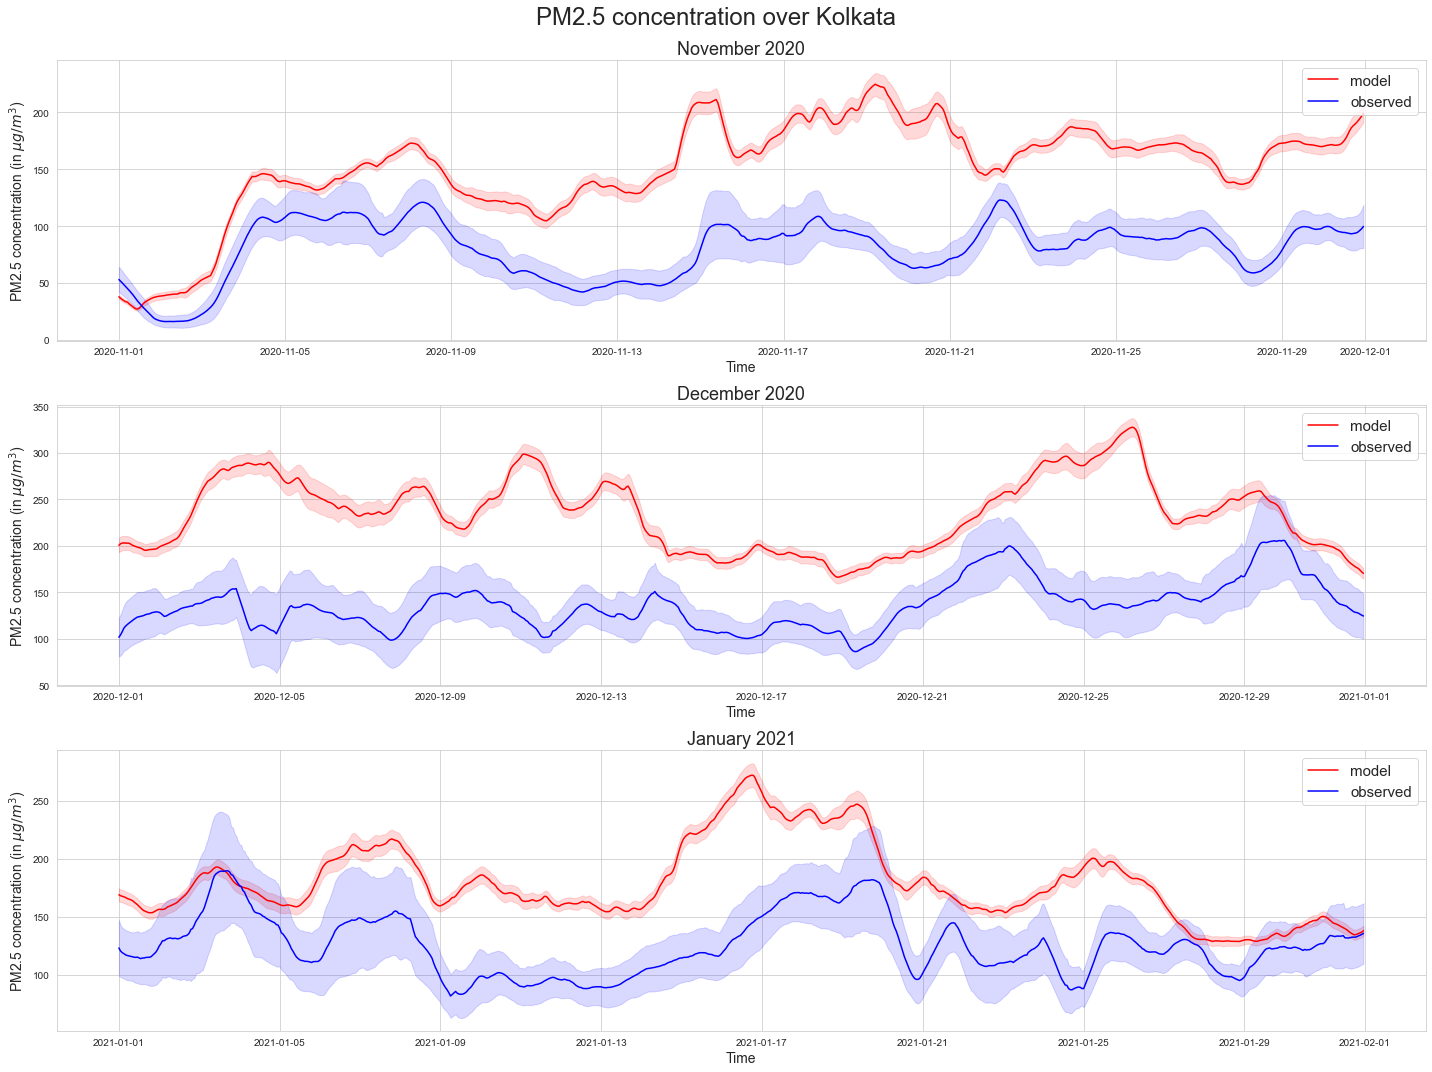

In [42]:
# Plot of PM2.5 model and data for Nov, Dec and Jan with errorbars

fig = plt.figure(figsize=(20,15))
plt.subplot(311)
sns.lineplot(data = dfnov, x='datetime', y='mod_pm2', err_style='band', label='model', color='red')
# plt.errorbar(dfmod_nov.index, dfmod_nov['mod_pm2'], yerr=dfmod_nov['mod_pm2_stdev'], alpha=0.15, ecolor='blue', fmt='o', mfc='blue', markersize=8, capsize=10)
plt.fill_between(dfnov.index, dfnov['mod_pm2'] + dfnov['mod_pm2_stdev'], dfnov['mod_pm2'] - dfnov['mod_pm2_stdev'], alpha=0.15, color='red')
sns.lineplot(data = dfnov, x='datetime', y='obs_pm2', err_style='band', label='observed', color='blue')
# plt.errorbar(dfobs_nov.index, dfobs_nov['obs_pm2'], yerr=dfobs_nov['obs_pm2_stdev'], alpha=0.15, ecolor='green', fmt='o', mfc='green', markersize=8, capsize=10)
plt.fill_between(dfnov.index, dfnov['obs_pm2'] + dfnov['obs_pm2_stdev'], dfnov['obs_pm2'] - dfnov['obs_pm2_stdev'], alpha=0.15, color='blue')
plt.ylabel('PM2.5 concentration (in $\mu g/m^3$)', fontsize=14)
plt.xlabel('Time', fontsize=14)
plt.legend(loc=1, prop={'size': 15})
plt.title('November 2020', fontsize=18)

plt.subplot(312)
sns.lineplot(data = dfdec, x='datetime', y='mod_pm2', err_style='band', label='model', color='red')
# plt.errorbar(dfdec.index, dfdec['mod_pm2'], yerr=dfdec['mod_pm2_stdev'], alpha=0.15, ecolor='blue', fmt='o', mfc='blue', markersize=8, capsize=10)
plt.fill_between(dfdec.index, dfdec['mod_pm2'] + dfdec['mod_pm2_stdev'], dfdec['mod_pm2'] - dfdec['mod_pm2_stdev'], alpha=0.15, color='red')
sns.lineplot(data = dfdec, x='datetime', y='obs_pm2', err_style='band', label='observed', color='blue')
# plt.errorbar(dfdec.index, dfdec['obs_pm2'], yerr=dfdec['obs_pm2_stdev'], alpha=0.15, ecolor='green', fmt='o', mfc='green', markersize=8, capsize=10)
plt.fill_between(dfdec.index, dfdec['obs_pm2'] + dfdec['obs_pm2_stdev'], dfdec['obs_pm2'] - dfdec['obs_pm2_stdev'], alpha=0.15, color='blue')
plt.ylabel('PM2.5 concentration (in $\mu g/m^3$)', fontsize=14)
plt.xlabel('Time', fontsize=14)
plt.legend(loc=1, prop={'size': 15})
plt.title('December 2020', fontsize=18)

plt.subplot(313)
sns.lineplot(data = dfjan, x='datetime', y='mod_pm2', err_style='band', label='model', color='red')
# plt.errorbar(dfjan.index, dfjan['mod_pm2'], yerr=dfjan['mod_pm2_stdev'], alpha=0.15, ecolor='blue', fmt='o', mfc='blue', markersize=8, capsize=10)
plt.fill_between(dfjan.index, dfjan['mod_pm2'] + dfjan['mod_pm2_stdev'], dfjan['mod_pm2'] - dfjan['mod_pm2_stdev'], alpha=0.15, color='red')
sns.lineplot(data = dfjan, x='datetime', y='obs_pm2', err_style='band', label='observed', color='blue')
# plt.errorbar(dfjan.index, dfjan['obs_pm2'], yerr=dfjan['obs_pm2_stdev'], alpha=0.15, ecolor='green', fmt='o', mfc='green', markersize=8, capsize=10)
plt.fill_between(dfjan.index, dfjan['obs_pm2'] + dfjan['obs_pm2_stdev'], dfjan['obs_pm2'] - dfjan['obs_pm2_stdev'], alpha=0.15, color='blue')
plt.ylabel('PM2.5 concentration (in $\mu g/m^3$)', fontsize=14)
plt.xlabel('Time', fontsize=14)
plt.legend(loc=1, prop={'size': 15})
plt.title('January 2021', fontsize=18)

fig.suptitle('PM2.5 concentration over Kolkata', fontsize=24, y=0.99)
fig.tight_layout()
plt.savefig('./images/pm25ts_err_running.png')

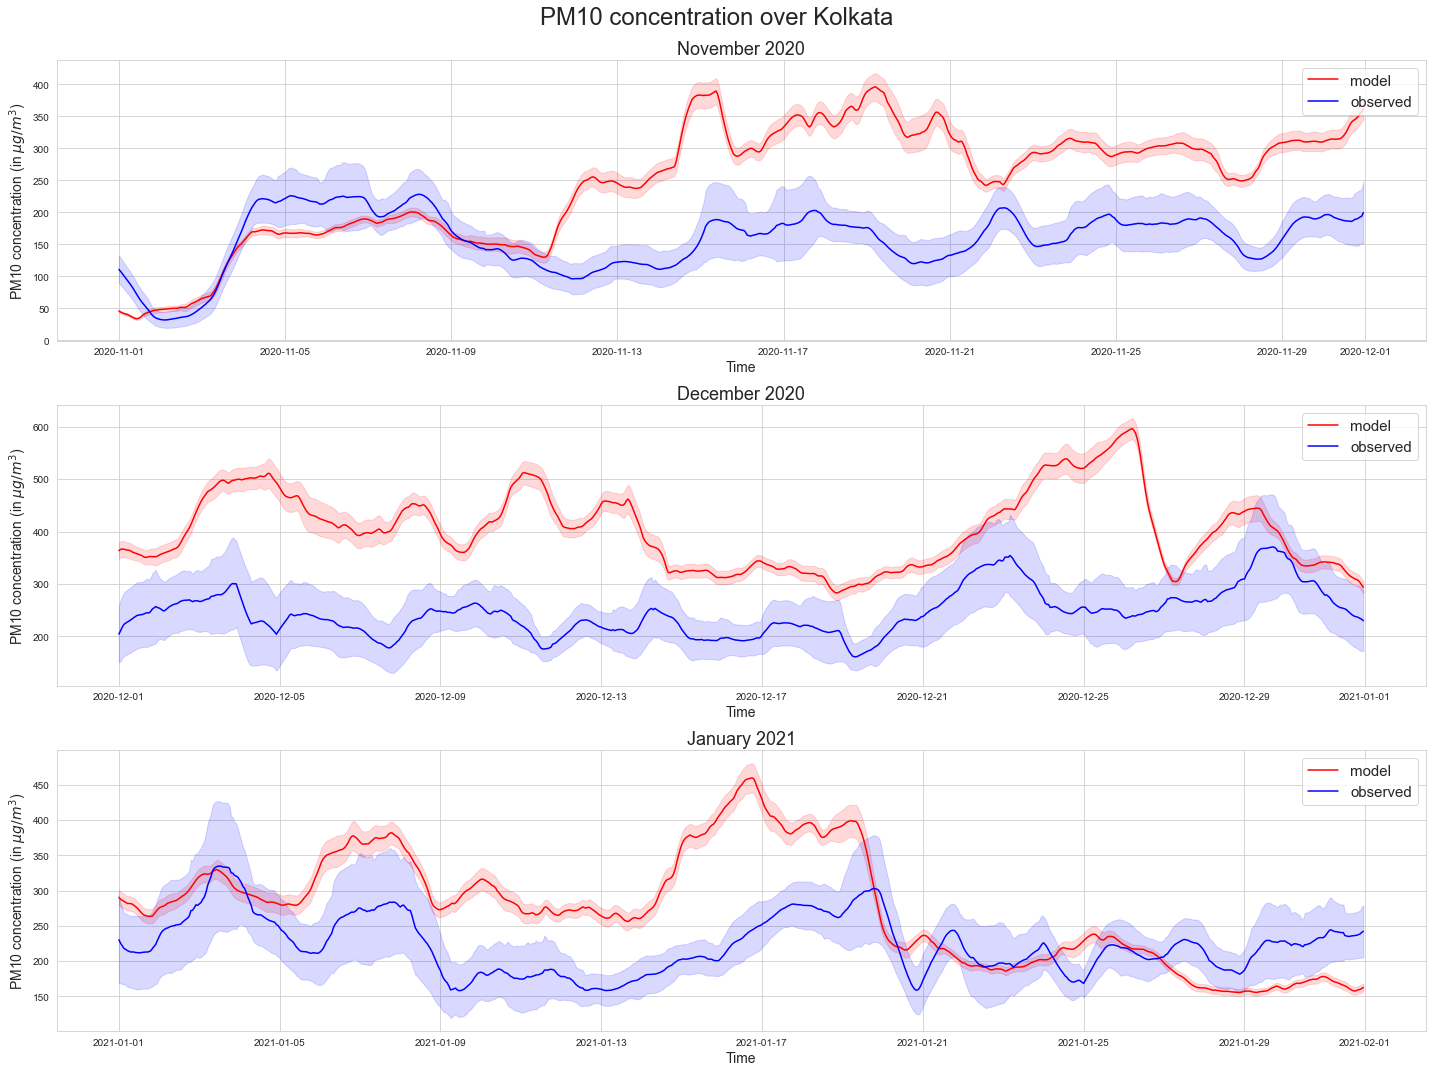

In [43]:
# Plot of PM10 model and data for Nov, Dec and Jan with errorbars

fig = plt.figure(figsize=(20,15))
plt.subplot(311)
sns.lineplot(data = dfnov, x='datetime', y='mod_pm10', err_style='band', label='model', color='red')
# plt.errorbar(dfnov.index, dfnov['mod_pm10'], yerr=dfnov['mod_pm10_stdev'], alpha=0.15, ecolor='blue', fmt='o', mfc='blue', markersize=8, capsize=10)
plt.fill_between(dfnov.index, dfnov['mod_pm10'] + dfnov['mod_pm10_stdev'], dfnov['mod_pm10'] - dfnov['mod_pm10_stdev'], alpha=0.15, color='red')
sns.lineplot(data = dfnov, x='datetime', y='obs_pm10', err_style='band', label='observed', color='blue')
# plt.errorbar(dfnov.index, dfnov['obs_pm10'], yerr=dfnov['obs_pm10_stdev'], alpha=0.15, ecolor='green', fmt='o', mfc='green', markersize=8, capsize=10)
plt.fill_between(dfnov.index, dfnov['obs_pm10'] + dfnov['obs_pm10_stdev'], dfnov['obs_pm10'] - dfnov['obs_pm10_stdev'], alpha=0.15, color='blue')
plt.ylabel('PM10 concentration (in $\mu g/m^3$)', fontsize=14)
plt.xlabel('Time', fontsize=14)
plt.legend(loc=1, prop={'size': 15})
plt.title('November 2020', fontsize=18)

plt.subplot(312)
sns.lineplot(data = dfdec, x='datetime', y='mod_pm10', err_style='band', label='model', color='red')
# plt.errorbar(dfnov.index, dfnov['mod_pm10'], yerr=dfnov['mod_pm10_stdev'], alpha=0.15, ecolor='blue', fmt='o', mfc='blue', markersize=8, capsize=10)
plt.fill_between(dfdec.index, dfdec['mod_pm10'] + dfdec['mod_pm10_stdev'], dfdec['mod_pm10'] - dfdec['mod_pm10_stdev'], alpha=0.15, color='red')
sns.lineplot(data = dfdec, x='datetime', y='obs_pm10', err_style='band', label='observed', color='blue')
# plt.errorbar(dfnov.index, dfnov['obs_pm10'], yerr=dfnov['obs_pm10_stdev'], alpha=0.15, ecolor='green', fmt='o', mfc='green', markersize=8, capsize=10)
plt.fill_between(dfdec.index, dfdec['obs_pm10'] + dfdec['obs_pm10_stdev'], dfdec['obs_pm10'] - dfdec['obs_pm10_stdev'], alpha=0.15, color='blue')
plt.ylabel('PM10 concentration (in $\mu g/m^3$)', fontsize=14)
plt.xlabel('Time', fontsize=14)
plt.legend(loc=1, prop={'size': 15})
plt.title('December 2020', fontsize=18)

plt.subplot(313)
sns.lineplot(data = dfjan, x='datetime', y='mod_pm10', err_style='band', label='model', color='red')
# plt.errorbar(dfnov.index, dfnov['mod_pm10'], yerr=dfnov['mod_pm10_stdev'], alpha=0.15, ecolor='blue', fmt='o', mfc='blue', markersize=8, capsize=10)
plt.fill_between(dfjan.index, dfjan['mod_pm10'] + dfjan['mod_pm10_stdev'], dfjan['mod_pm10'] - dfjan['mod_pm10_stdev'], alpha=0.15, color='red')
sns.lineplot(data = dfjan, x='datetime', y='obs_pm10', err_style='band', label='observed', color='blue')
# plt.errorbar(dfnov.index, dfnov['obs_pm10'], yerr=dfnov['obs_pm10_stdev'], alpha=0.15, ecolor='green', fmt='o', mfc='green', markersize=8, capsize=10)
plt.fill_between(dfjan.index, dfjan['obs_pm10'] + dfjan['obs_pm10_stdev'], dfjan['obs_pm10'] - dfjan['obs_pm10_stdev'], alpha=0.15, color='blue')
plt.ylabel('PM10 concentration (in $\mu g/m^3$)', fontsize=14)
plt.xlabel('Time', fontsize=14)
plt.legend(loc=1, prop={'size': 15})
plt.title('January 2021', fontsize=18)

fig.suptitle('PM10 concentration over Kolkata', fontsize=24, y=0.99)
fig.tight_layout()
plt.savefig('./images/pm10ts_err_running.png')

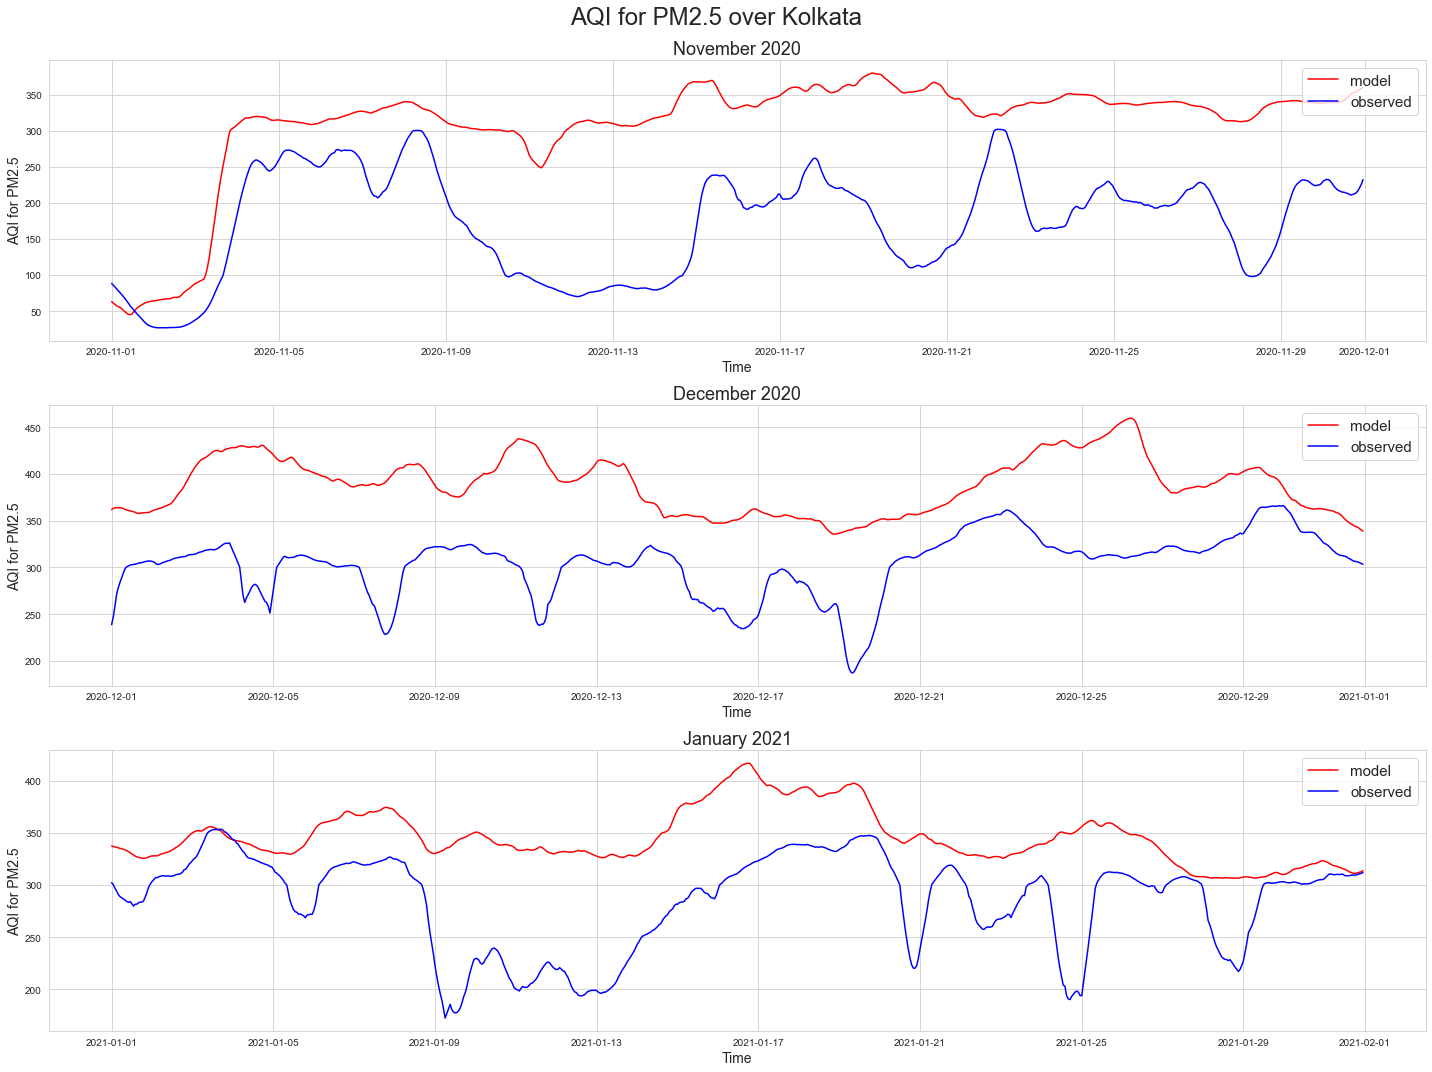

In [44]:
# Plot of AQI_PM2.5 model and data Time series for Nov, Dec and Jan

fig = plt.figure(figsize=(20,15))
plt.subplot(311)
sns.lineplot(data = dfnov, x='datetime', y='mod_aqi_pm2', err_style='band', label='model', color='red')
sns.lineplot(data = dfnov, x='datetime', y='obs_aqi_pm2', err_style='band', label='observed', color='blue')
plt.ylabel('AQI for PM2.5', fontsize=14)
plt.xlabel('Time', fontsize=14)
plt.legend(loc=1, prop={'size': 15})
plt.title('November 2020', fontsize=18)

plt.subplot(312)
sns.lineplot(data = dfdec, x='datetime', y='mod_aqi_pm2', err_style='band', label='model', color='red')
sns.lineplot(data = dfdec, x='datetime', y='obs_aqi_pm2', err_style='band', label='observed', color='blue')
plt.ylabel('AQI for PM2.5', fontsize=14)
plt.xlabel('Time', fontsize=14)
plt.legend(loc=1, prop={'size': 15})
plt.title('December 2020', fontsize=18)

plt.subplot(313)
sns.lineplot(data = dfjan, x='datetime', y='mod_aqi_pm2', err_style='band', label='model', color='red')
sns.lineplot(data = dfjan, x='datetime', y='obs_aqi_pm2', err_style='band', label='observed', color='blue')
plt.ylabel('AQI for PM2.5', fontsize=14)
plt.xlabel('Time', fontsize=14)
plt.legend(loc=1, prop={'size': 15})
plt.title('January 2021', fontsize=18)

fig.suptitle('AQI for PM2.5 over Kolkata', fontsize=24, y=0.99)
fig.tight_layout()
plt.savefig('./images/aqi_pm25_ts.png')

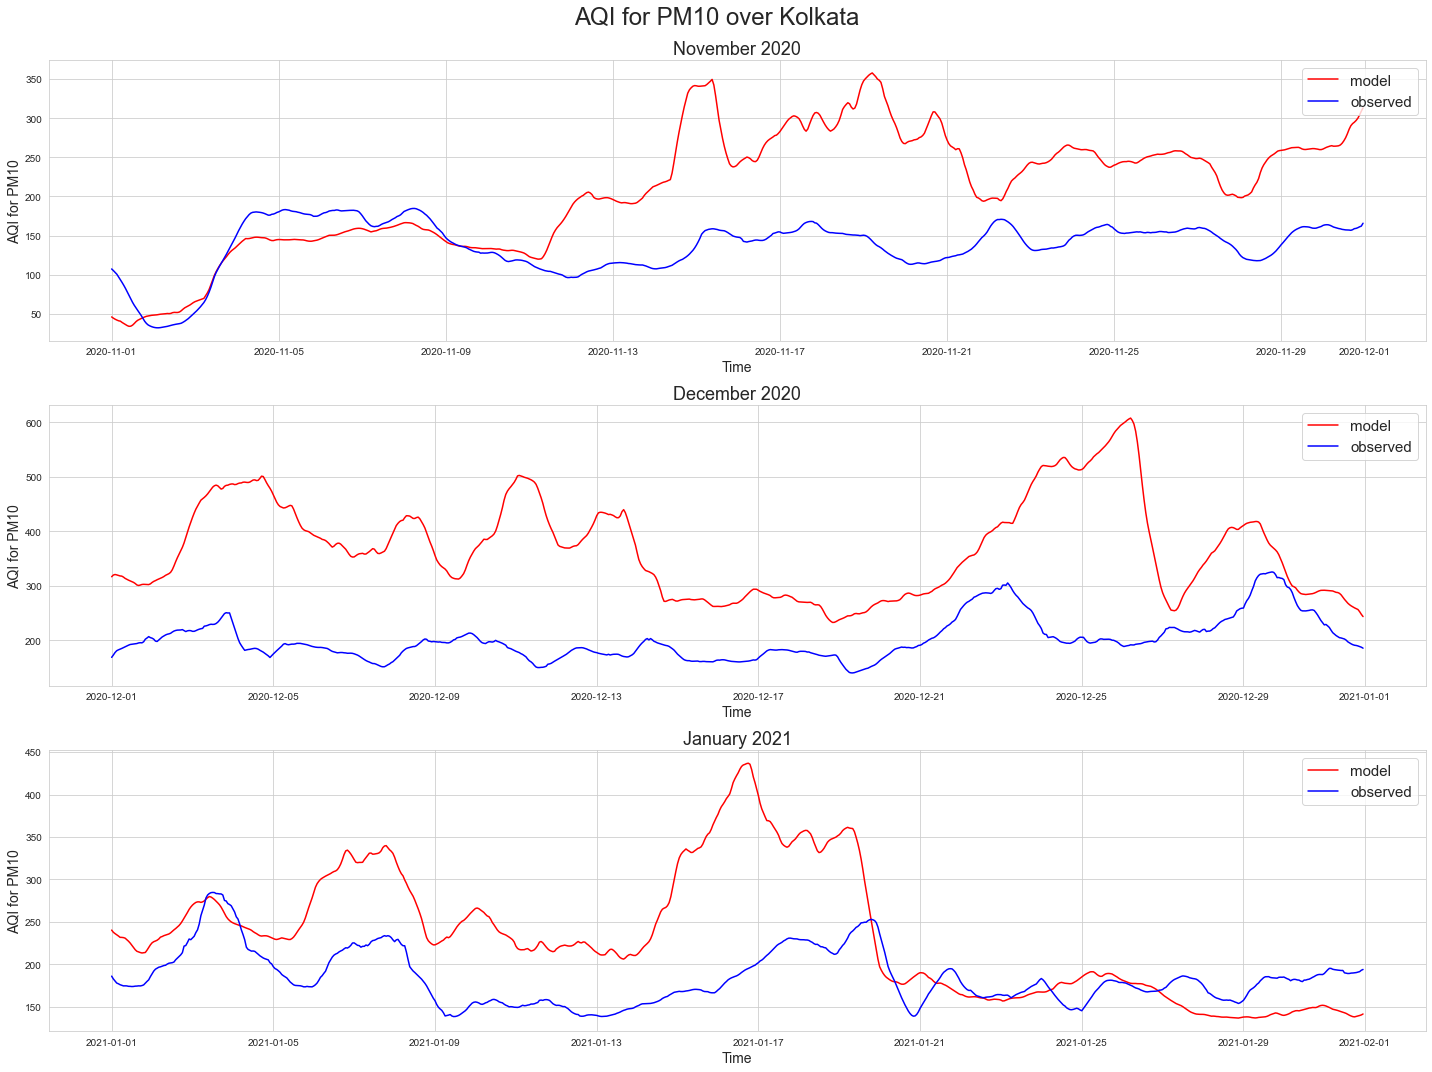

In [45]:
# Plot of AQI_PM10 model and data Time series for Nov, Dec and Jan

fig = plt.figure(figsize=(20,15))
plt.subplot(311)
sns.lineplot(data = dfnov, x='datetime', y='mod_aqi_pm10', err_style='band', label='model', color='red')
sns.lineplot(data = dfnov, x='datetime', y='obs_aqi_pm10', err_style='band', label='observed', color='blue')
plt.ylabel('AQI for PM10', fontsize=14)
plt.xlabel('Time', fontsize=14)
plt.legend(loc=1, prop={'size': 15})
plt.title('November 2020', fontsize=18)

plt.subplot(312)
sns.lineplot(data = dfdec, x='datetime', y='mod_aqi_pm10', err_style='band', label='model', color='red')
sns.lineplot(data = dfdec, x='datetime', y='obs_aqi_pm10', err_style='band', label='observed', color='blue')
plt.ylabel('AQI for PM10', fontsize=14)
plt.xlabel('Time', fontsize=14)
plt.legend(loc=1, prop={'size': 15})
plt.title('December 2020', fontsize=18)

plt.subplot(313)
sns.lineplot(data = dfjan, x='datetime', y='mod_aqi_pm10', err_style='band', label='model', color='red')
sns.lineplot(data = dfjan, x='datetime', y='obs_aqi_pm10', err_style='band', label='observed', color='blue')
plt.ylabel('AQI for PM10', fontsize=14)
plt.xlabel('Time', fontsize=14)
plt.legend(loc=1, prop={'size': 15})
plt.title('January 2021', fontsize=18)

fig.suptitle('AQI for PM10 over Kolkata', fontsize=24, y=0.99)
fig.tight_layout()
plt.savefig('./images/aqi_pm10_ts.png')